In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import os
import sys
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)



True

In [2]:
# Load the CSV file into a DataFrame
clean_tweets = pd.read_csv('cleaned_safaricom_data.csv')

# Display information about the DataFrame
clean_tweets.info()

# Display the first 5 rows of the DataFrame
clean_tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content         3700 non-null   object
 1   Likes           3700 non-null   int64 
 2   Retweets        3700 non-null   int64 
 3   Replies         3700 non-null   int64 
 4   Quotes          3700 non-null   int64 
 5   Views           3700 non-null   int64 
 6   Date            3700 non-null   object
 7   Labels          3700 non-null   object
 8   chars           3700 non-null   int64 
 9   words           3700 non-null   int64 
 10  sentences       3700 non-null   int64 
 11  Tokenized Text  3700 non-null   object
 12  Lematized Text  3700 non-null   object
 13  processed_text  3700 non-null   object
dtypes: int64(8), object(6)
memory usage: 404.8+ KB


,Content,Likes,Retweets,Replies,Quotes,Views,Date,Labels,chars,words,sentences,Tokenized Text,Lematized Text,processed_text
0,how comes i have overdue debts na sijakopawhat...,1,0,0,0,21,"July 27, 2025 at 07:51 PM",Customer care complaint,99,19,1,"['how', 'comes', 'i', 'have', 'overdue', 'debt...","['how', 'come', 'i', 'have', 'overdue', 'debt'...",how come i have overdue debt na sijakopawhats ...
1,montyhasashi safaricom,0,0,0,0,22,"July 27, 2025 at 03:26 AM",Neutral,28,5,1,"['montyhasashi', 'safaricom']","['montyhasashi', 'safaricom']",montyhasashi safaricom
2,safaricom weka data wacheni jokesthank you for...,0,0,0,0,6,"July 26, 2025 at 08:23 AM",Internet or airtime bundle complaint,181,38,2,"['safaricom', 'weka', 'data', 'wacheni', 'joke...","['safaricom', 'weka', 'data', 'wacheni', 'joke...",safaricom weka data wacheni jokesthank you for...
3,safaricomplc hello safaricomplc safaricom can ...,0,0,0,0,47,"July 24, 2025 at 08:13 PM",Customer care complaint,280,53,4,"['safaricomplc', 'hello', 'safaricomplc', 'saf...","['safaricomplc', 'hello', 'safaricomplc', 'saf...",safaricomplc hello safaricomplc safaricom can ...
4,peterndegwa safaricomplc safaricomcare safbusi...,0,0,0,0,5,"July 24, 2025 at 10:51 AM",Customer care complaint,255,48,2,"['peterndegwa', 'safaricomplc', 'safaricomcare...","['peterndegwa', 'safaricomplc', 'safaricomcare...",peterndegwa safaricomplc safaricomcare safbusi...


In [5]:

# Check the number of unique classes and their counts
print("Unique classes:", clean_tweets['Labels'].unique())
print("\nClass distribution:")
print(clean_tweets['Labels'].value_counts())

Unique classes: ['Customer care complaint' 'Neutral'
 'Internet or airtime bundle complaint' 'Hate Speech'
 'Data protection and privacy concern' 'Network reliability problem'
 'MPESA complaint']

Class distribution:
Neutral                                 1094
Hate Speech                              828
Customer care complaint                  601
Internet or airtime bundle complaint     375
MPESA complaint                          282
Data protection and privacy concern      264
Network reliability problem              256
Name: Labels, dtype: int64


In [10]:
# Drop all rows where the label is 'neutral'
clean_tweets = clean_tweets[clean_tweets['Labels'] != 'Neutral']

# Optional: Reset the index after filtering
clean_tweets.reset_index(drop=True, inplace=True)

# Confirm the remaining classes
print("Remaining classes:", clean_tweets['Labels'].unique())
print("\nUpdated class distribution:")
print(clean_tweets['Labels'].value_counts())


Remaining classes: ['Customer care complaint' 'Internet or airtime bundle complaint'
 'Hate Speech' 'Data protection and privacy concern'
 'Network reliability problem' 'MPESA complaint']

Updated class distribution:
Hate Speech                             828
Customer care complaint                 601
Internet or airtime bundle complaint    375
MPESA complaint                         282
Data protection and privacy concern     264
Network reliability problem             256
Name: Labels, dtype: int64


In [13]:
# View some random samples of text
clean_tweets['Content'].sample(10, random_state=42).tolist()


['safaricom were involved in this killings walizima net that time watu wakauliwa retweet guys we need to do something about safaricom osamaotero honeyfarsafi afro254 kimuzi',
 'lindahoguttu kcbgroup same to safaricomplc imf branch along kenyatta avenue i was served after two hrssee ticket sr 326 safaricom',
 'safaricomplc safaricom mbona mmenisend ksh 2 ati from my inactive number sa hata sielewi ilkua ya nini',
 'safaricom ati nasikia ni nyinyi mnatupeana i hope hamtauliza wapi',
 'safari0comcare safaricom mikoranimewashika',
 'safaricom we need an answer ama to hame',
 'donpierrek safaricomcare safaricom happened',
 'nkurikiyenoel7 airtelrw mtnrwanda rrainfo safaricom nabe nawe chn',
 'my kids show on youtube is working quite well but somehow news channels are buffing and twitter is snailing up not buying that undersea cable story from safaricom any way rejectfinancebill2024',
 'weakspell i dont want banks safaricom and kracorporate invading kenyans privacy i want reasonable taxes ac

<AxesSubplot:title={'center':"Class Distribution (after dropping 'Neutral')"}>

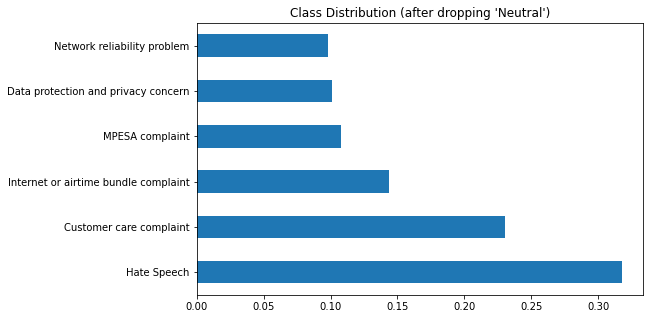

In [14]:
# Check class distribution
clean_tweets['Labels'].value_counts(normalize=True).plot.barh(title="Class Distribution (after dropping 'Neutral')", figsize=(8,5))


In [15]:
# Absolute counts
print(clean_tweets['Labels'].value_counts())

# Percentage distribution
print(clean_tweets['Labels'].value_counts(normalize=True) * 100)


Hate Speech                             828
Customer care complaint                 601
Internet or airtime bundle complaint    375
MPESA complaint                         282
Data protection and privacy concern     264
Network reliability problem             256
Name: Labels, dtype: int64
Hate Speech                             31.772832
Customer care complaint                 23.062164
Internet or airtime bundle complaint    14.389870
MPESA complaint                         10.821182
Data protection and privacy concern     10.130468
Network reliability problem              9.823484
Name: Labels, dtype: float64


In [21]:
# Step 1: Define X and y
X = clean_tweets['processed_text']
y = clean_tweets['Labels']


In [22]:
from sklearn.model_selection import train_test_split

# Step 2: Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train shape: (2084,)
X_test shape: (522,)
y_train distribution:
 Hate Speech                             662
Customer care complaint                 481
Internet or airtime bundle complaint    300
MPESA complaint                         225
Data protection and privacy concern     211
Network reliability problem             205
Name: Labels, dtype: int64


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 3: TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)



X_train_tfidf shape: (2084, 5000)
X_test_tfidf shape: (522, 5000)


Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

# Step 4: Train Logistic Regression with class_weight='balanced'
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict on test set
lr_preds = lr_model.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 5: Evaluation
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, lr_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_preds))


🔍 Logistic Regression Classification Report:

                                      precision    recall  f1-score   support

             Customer care complaint       0.60      0.57      0.58       120
 Data protection and privacy concern       0.46      0.70      0.55        53
                         Hate Speech       0.76      0.63      0.69       166
Internet or airtime bundle complaint       0.49      0.52      0.50        75
                     MPESA complaint       0.56      0.47      0.51        57
         Network reliability problem       0.38      0.45      0.41        51

                            accuracy                           0.57       522
                           macro avg       0.54      0.56      0.54       522
                        weighted avg       0.59      0.57      0.58       522

📊 Confusion Matrix:
[[ 68  14  14  12   5   7]
 [  5  37   3   3   1   4]
 [ 23  16 105  12   4   6]
 [  7   3   9  39   3  14]
 [  5   5   6   8  27   6]
 [  6   6   2   

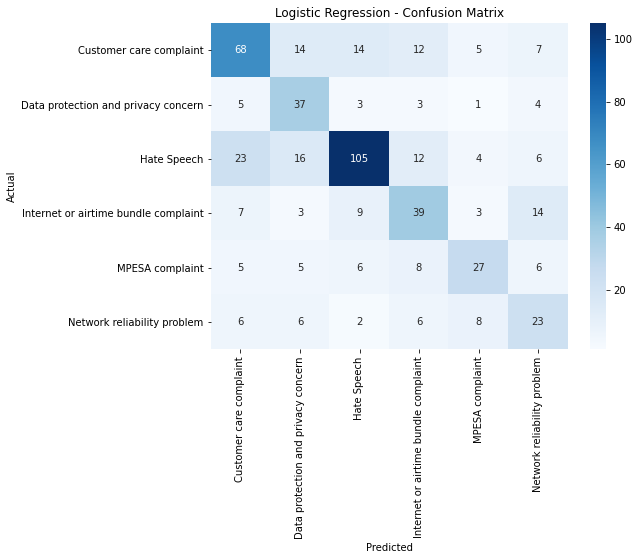

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Step 8a: Heatmap for Logistic Regression
plt.figure(figsize=(8,6))
sns.heatmap(
    confusion_matrix(y_test, lr_preds),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=lr_model.classes_,
    yticklabels=lr_model.classes_
)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Baiyes

In [27]:
from sklearn.naive_bayes import MultinomialNB

# Step 6: Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test data
nb_preds = nb_model.predict(X_test_tfidf)
# Step 7: Evaluation
print("🔍 Naive Bayes Classification Report:\n")
print(classification_report(y_test, nb_preds))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, nb_preds))


🔍 Naive Bayes Classification Report:

                                      precision    recall  f1-score   support

             Customer care complaint       0.36      0.69      0.48       120
 Data protection and privacy concern       0.00      0.00      0.00        53
                         Hate Speech       0.53      0.83      0.64       166
Internet or airtime bundle complaint       0.77      0.27      0.40        75
                     MPESA complaint       1.00      0.09      0.16        57
         Network reliability problem       0.00      0.00      0.00        51

                            accuracy                           0.47       522
                           macro avg       0.44      0.31      0.28       522
                        weighted avg       0.47      0.47      0.39       522

📊 Confusion Matrix:
[[ 83   0  35   2   0   0]
 [ 30   0  23   0   0   0]
 [ 27   0 138   1   0   0]
 [ 27   0  28  20   0   0]
 [ 34   0  17   1   5   0]
 [ 28   0  21   2   0   

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


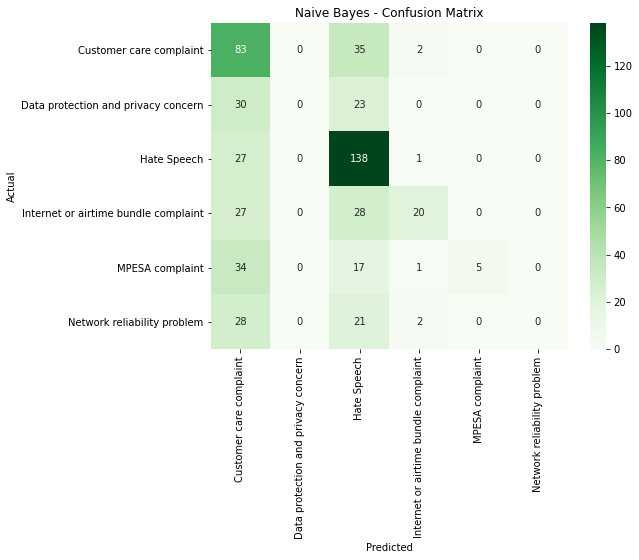

In [31]:
# Step 8b: Heatmap for Naive Bayes
plt.figure(figsize=(8,6))
sns.heatmap(
    confusion_matrix(y_test, nb_preds),
    annot=True, fmt='d', cmap='Greens',
    xticklabels=nb_model.classes_,
    yticklabels=nb_model.classes_
)
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_tfidf, y_train)

# Predict
rf_preds = rf_clf.predict(X_test_tfidf)

# Evaluation
print("🔍 Random Forest (Before SMOTE) Classification Report:\n")
print(classification_report(y_test, rf_preds))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))


🔍 Random Forest (Before SMOTE) Classification Report:

                                      precision    recall  f1-score   support

             Customer care complaint       0.44      0.58      0.50       120
 Data protection and privacy concern       0.50      0.13      0.21        53
                         Hate Speech       0.55      0.83      0.66       166
Internet or airtime bundle complaint       0.61      0.33      0.43        75
                     MPESA complaint       0.56      0.32      0.40        57
         Network reliability problem       0.46      0.25      0.33        51

                            accuracy                           0.52       522
                           macro avg       0.52      0.41      0.42       522
                        weighted avg       0.52      0.52      0.49       522

📊 Confusion Matrix:
[[ 70   4  40   3   2   1]
 [ 22   7  22   1   1   0]
 [ 17   2 137   3   4   3]
 [ 18   0  20  25   3   9]
 [ 18   1  14   4  18   2]
 [ 14  

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0, flags=flags)


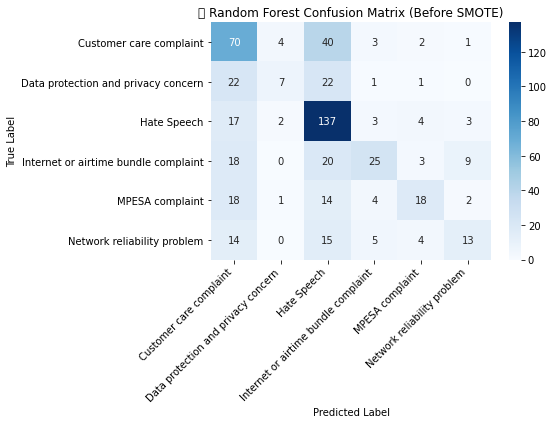

In [56]:
# Compute confusion matrix
rf_cm_before = confusion_matrix(y_test, rf_preds)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm_before, annot=True, fmt='d', cmap='Blues', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("📊 Random Forest Confusion Matrix (Before SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [66]:
from sklearn.metrics import f1_score, accuracy_score

# Logistic Regression
lr_f1 = f1_score(y_test, lr_preds, average='macro')
lr_acc = accuracy_score(y_test, lr_preds)

print("📊 Logistic Regression (Before SMOTE)")
print(f"   Accuracy : {lr_acc:.4f}")
print(f"   Macro F1 : {lr_f1:.4f}\n")

# Naive Bayes
nb_f1 = f1_score(y_test, nb_preds, average='macro')
nb_acc = accuracy_score(y_test, nb_preds)

print("📊 Naive Bayes (Before SMOTE)")
print(f"   Accuracy : {nb_acc:.4f}")
print(f"   Macro F1 : {nb_f1:.4f}\n")

# Random Forest
rf_f1 = f1_score(y_test, rf_preds, average='macro')
rf_acc = accuracy_score(y_test, rf_preds)

print("📊 Random Forest (Before SMOTE)")
print(f"   Accuracy : {rf_acc:.4f}")
print(f"   Macro F1 : {rf_f1:.4f}")


📊 Logistic Regression (Before SMOTE)
   Accuracy : 0.5728
   Macro F1 : 0.5423

📊 Naive Bayes (Before SMOTE)
   Accuracy : 0.4713
   Macro F1 : 0.2796

📊 Random Forest (Before SMOTE)
   Accuracy : 0.5172
   Macro F1 : 0.4229


Balancing usig SMOTE then modelling

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Apply SMOTE to balance classes in training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Train Logistic Regression on balanced data
lr_balanced = LogisticRegression(max_iter=1000, random_state=42)
lr_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_lr_balanced = lr_balanced.predict(X_test_tfidf)

# Evaluate model
report = classification_report(y_test, y_pred_lr_balanced)
conf_matrix = confusion_matrix(y_test, y_pred_lr_balanced)

# Display results
print("📊 Logistic Regression after SMOTE\n")
print(report)
print("\nConfusion Matrix:\n", conf_matrix)


📊 Logistic Regression after SMOTE

                                      precision    recall  f1-score   support

             Customer care complaint       0.58      0.56      0.57       120
 Data protection and privacy concern       0.52      0.70      0.60        53
                         Hate Speech       0.72      0.69      0.71       166
Internet or airtime bundle complaint       0.57      0.57      0.57        75
                     MPESA complaint       0.57      0.49      0.53        57
         Network reliability problem       0.44      0.45      0.45        51

                            accuracy                           0.60       522
                           macro avg       0.57      0.58      0.57       522
                        weighted avg       0.60      0.60      0.60       522


Confusion Matrix:
 [[ 67  11  22  10   5   5]
 [  6  37   4   1   1   4]
 [ 20  11 115   9   5   6]
 [  9   1  10  43   2  10]
 [  6   5   7   7  28   4]
 [  7   6   2   5   8  23]]

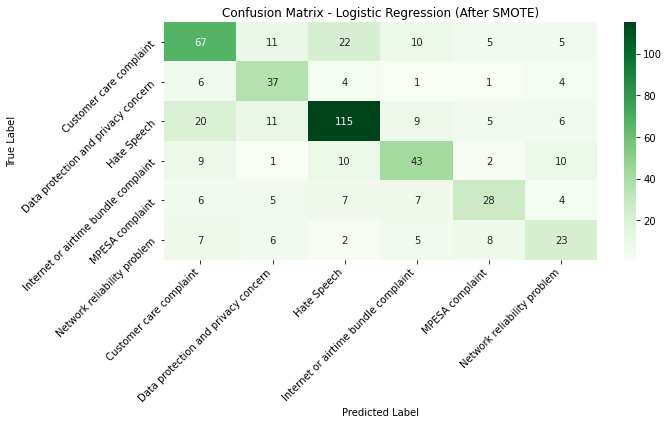

In [40]:
# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr_balanced)
labels = lr_balanced.classes_  # Get class labels in the same order

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression (After SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45,ha ='right')
plt.yticks(rotation=45, ha ='right' )
plt.tight_layout()
plt.show()


Naive Bayes after SMOTE

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Train Naive Bayes on SMOTE-balanced data
nb_balanced = MultinomialNB()
nb_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_nb_balanced = nb_balanced.predict(X_test_tfidf)

# Evaluate Naive Bayes
print("📊 Naive Bayes after SMOTE\n")
print(classification_report(y_test, y_pred_nb_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb_balanced))


📊 Naive Bayes after SMOTE

                                      precision    recall  f1-score   support

             Customer care complaint       0.57      0.54      0.56       120
 Data protection and privacy concern       0.34      0.66      0.45        53
                         Hate Speech       0.82      0.40      0.54       166
Internet or airtime bundle complaint       0.42      0.53      0.47        75
                     MPESA complaint       0.43      0.51      0.46        57
         Network reliability problem       0.33      0.39      0.36        51

                            accuracy                           0.49       522
                           macro avg       0.48      0.51      0.47       522
                        weighted avg       0.56      0.49      0.50       522


Confusion Matrix:
 [[65 17  6 10 13  9]
 [ 4 35  3  3  5  3]
 [29 31 67 23  6 10]
 [ 6  7  3 40  5 14]
 [ 5  7  2  9 29  5]
 [ 5  5  1 10 10 20]]


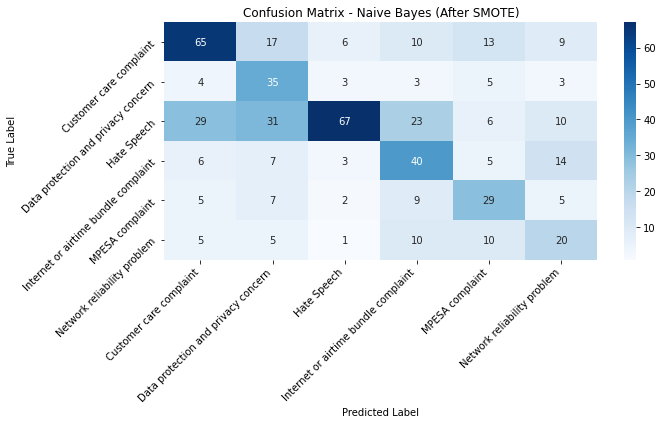

In [41]:
# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb_balanced)
labels = nb_balanced.classes_  # class labels in correct order

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Naive Bayes (After SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45,ha ='right')
plt.yticks(rotation=45,ha ='right')
plt.tight_layout()
plt.show()


In [55]:
# Train on SMOTE data
rf_smote_clf = RandomForestClassifier(random_state=42)
rf_smote_clf.fit(X_train_balanced  , y_train_balanced)

# Predict
rf_smote_preds = rf_smote_clf.predict(X_test_tfidf)

# Evaluation
print("🔍 Random Forest (After SMOTE) Classification Report:\n")
print(classification_report(y_test, rf_smote_preds))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, rf_smote_preds))


🔍 Random Forest (After SMOTE) Classification Report:

                                      precision    recall  f1-score   support

             Customer care complaint       0.50      0.50      0.50       120
 Data protection and privacy concern       0.58      0.34      0.43        53
                         Hate Speech       0.56      0.78      0.65       166
Internet or airtime bundle complaint       0.62      0.44      0.52        75
                     MPESA complaint       0.52      0.46      0.49        57
         Network reliability problem       0.51      0.39      0.44        51

                            accuracy                           0.55       522
                           macro avg       0.55      0.48      0.50       522
                        weighted avg       0.55      0.55      0.54       522

📊 Confusion Matrix:
[[ 60   5  41   5   5   4]
 [ 14  18  17   0   3   1]
 [ 19   6 129   4   5   3]
 [ 10   1  19  33   1  11]
 [ 11   0  12   8  26   0]
 [  5   

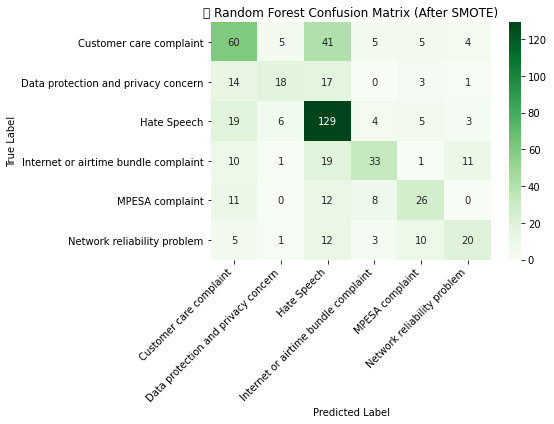

In [57]:
# Compute confusion matrix
rf_cm_after = confusion_matrix(y_test, rf_smote_preds)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("📊 Random Forest Confusion Matrix (After SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [67]:
# Logistic Regression
lr_f1_after = f1_score(y_test, lr_preds, average='macro')
lr_acc_after = accuracy_score(y_test, lr_preds)

print("📊 Logistic Regression (After SMOTE)")
print(f"   Accuracy : {lr_acc_after:.4f}")
print(f"   Macro F1 : {lr_f1_after:.4f}\n")

# Naive Bayes
nb_f1_after = f1_score(y_test, nb_preds, average='macro')
nb_acc_after = accuracy_score(y_test, nb_preds)

print("📊 Naive Bayes (After SMOTE)")
print(f"   Accuracy : {nb_acc_after:.4f}")
print(f"   Macro F1 : {nb_f1_after:.4f}\n")

# Random Forest
rf_f1_after = f1_score(y_test, rf_smote_preds, average='macro')
rf_acc_after = accuracy_score(y_test, rf_smote_preds)

print("📊 Random Forest (After SMOTE)")
print(f"   Accuracy : {rf_acc_after:.4f}")
print(f"   Macro F1 : {rf_f1_after:.4f}")


📊 Logistic Regression (After SMOTE)
   Accuracy : 0.5728
   Macro F1 : 0.5423

📊 Naive Bayes (After SMOTE)
   Accuracy : 0.4713
   Macro F1 : 0.2796

📊 Random Forest (After SMOTE)
   Accuracy : 0.5479
   Macro F1 : 0.5047


c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0, flags=flags)


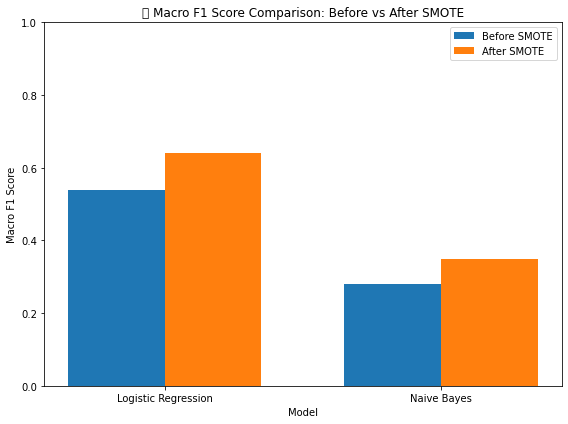

In [44]:
import matplotlib.pyplot as plt

# Replace with your actual results
lr_f1_before = 0.54
nb_f1_before = 0.28
lr_f1_after = 0.64
nb_f1_after = 0.35

models = ['Logistic Regression', 'Naive Bayes']
before = [lr_f1_before, nb_f1_before]
after = [lr_f1_after, nb_f1_after]

x = range(len(models))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x, before, width=width, label='Before SMOTE')
plt.bar([i + width for i in x], after, width=width, label='After SMOTE')

plt.xlabel('Model')
plt.ylabel('Macro F1 Score')
plt.title('📊 Macro F1 Score Comparison: Before vs After SMOTE')
plt.xticks([i + width / 2 for i in x], models)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


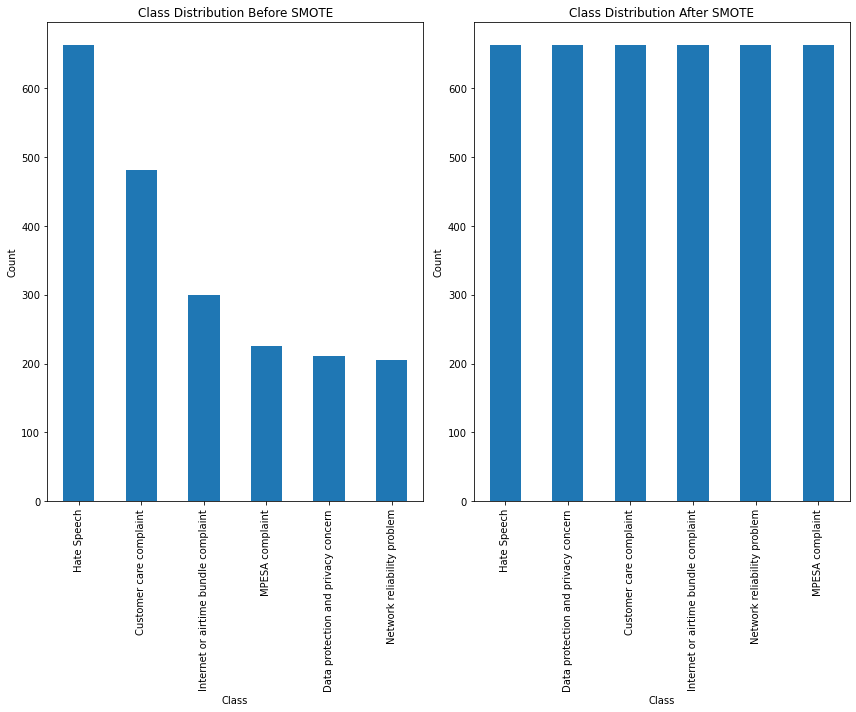

In [51]:
# Assuming y_train and y_train_res exist
before_counts = y_train.value_counts()
after_counts = y_train_balanced.value_counts()

plt.figure(figsize=(12, 10))

# Plot before SMOTE
plt.subplot(1, 2, 1)
before_counts.plot(kind='bar')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot after SMOTE
plt.subplot(1, 2, 2)
after_counts.plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
